### Importing the data and the functions

In [1]:
include("importData.jl")
include("DDEmodel.jl")
include("Hill.jl")
include("ODEmodel.jl")
include("plot.jl")

# import data from the path

# population data, g2 data, g1 data, initial number of cells in g1, initial number of cells in g2
# lapatinib
conc_l, pop_l, g2_l, g1_l, g2_0_l, g1_0_l = setup_data("lapatinib");

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/dde/correlation/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/dde/correlation/DrugResponseModel.jl/src/importData.jl:37


### A) cartoon 

In [2]:
# will do in the Affinity designer of power point

### B) ODE fitting of Lapatinib data

In [3]:
# initial values
p = [8.870525324, 8.492087169, 0.43447323, 7.67847790]

# setting lowest delay for tau1 to be half an hour and for tau2 to be 3 hours.
low = 0.0001*ones(4)
upp = 0.1*ones(4)
params_ode = zeros(4, 8)

# ODE optimization and estimation of the parameters
for i in 1:8
    params_ode[:, i] = ODEoptimizer(low, upp, p, i, g1_l, g2_l, g1_0_l, g2_0_l)
end

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 0.74 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 13597.75
Function evals per second = 13732.36
Improvements/step = 0.17740
Total function evaluations = 10100


Best candidate found: [0.0435465, 0.0239081, 0.000100067, 0.000100021]

Fitness: 271.618363866

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 0.61 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 16482.47
Function evals per second = 16647.27
Improvements/step = 0.20780
Total function evaluations = 10101


Best candidate f

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = ode_plotIt(::Array{Float64,1}, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}, ::DataFrame, ::Int64, ::String) at ODEmodel.jl:57
└ @ Main /home/farnazm/dde/correlation/DrugResponseModel.jl/src/ODEmodel.jl:57


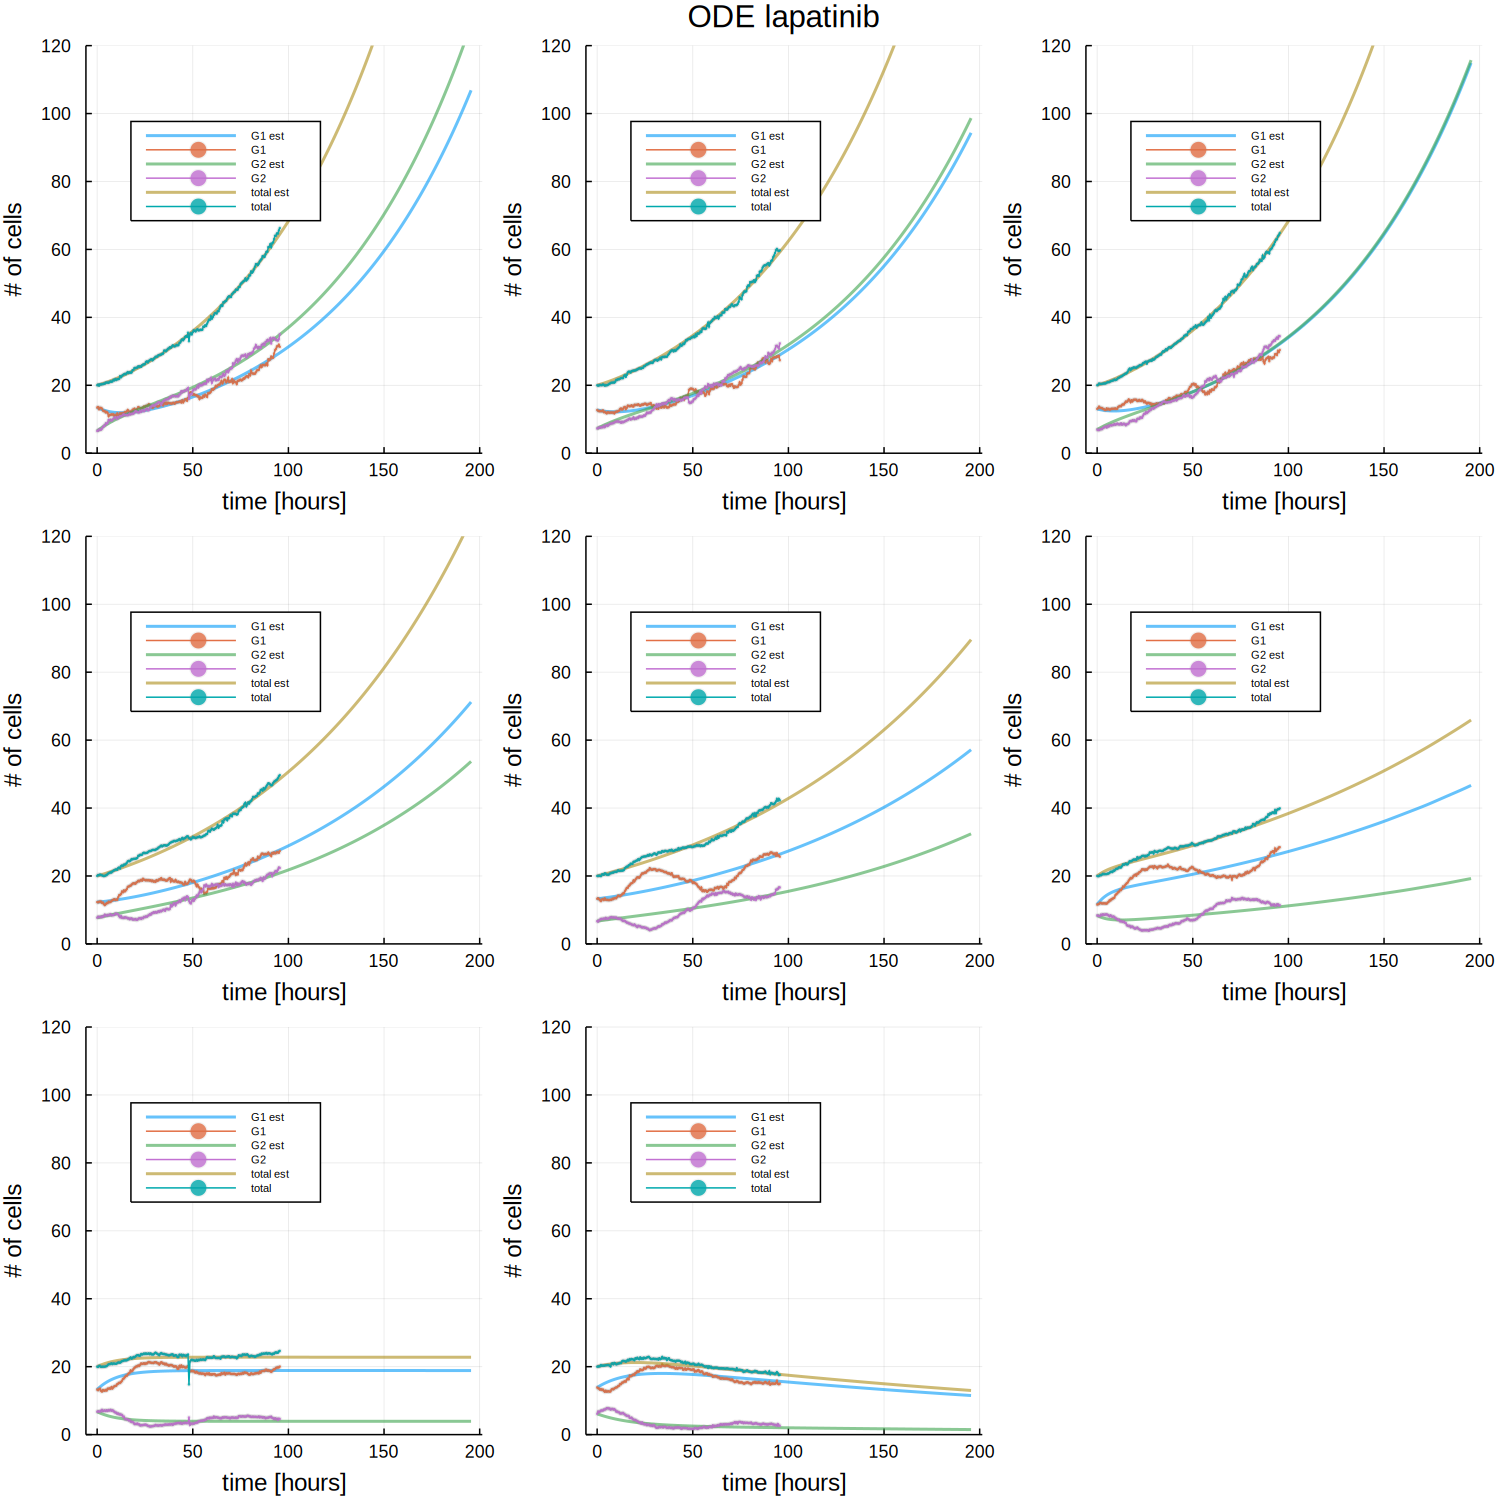

In [4]:
# plotting the fitted curves
r1 = ode_plotIt(params_ode[:, 1], g1_l, g2_l, g1_0_l, g2_0_l, pop_l, 1, "")
r2 = ode_plotIt(params_ode[:, 2], g1_l, g2_l, g1_0_l, g2_0_l, pop_l, 2, "ODE lapatinib")
r3 = ode_plotIt(params_ode[:, 3], g1_l, g2_l, g1_0_l, g2_0_l, pop_l, 3, "")
r4 = ode_plotIt(params_ode[:, 4], g1_l, g2_l, g1_0_l, g2_0_l, pop_l, 4, "")
r5 = ode_plotIt(params_ode[:, 5], g1_l, g2_l, g1_0_l, g2_0_l, pop_l, 5, "")
r6 = ode_plotIt(params_ode[:, 6], g1_l, g2_l, g1_0_l, g2_0_l, pop_l, 6, "")
r7 = ode_plotIt(params_ode[:, 7], g1_l, g2_l, g1_0_l, g2_0_l, pop_l, 7, "")
r8 = ode_plotIt(params_ode[:, 8], g1_l, g2_l, g1_0_l, g2_0_l, pop_l, 8, "")
plot(r1, r2, r3, r4, r5, r6, r7, r8)
plot!(size=(1000, 1000), layout = (4,2))
ylims!((0.0, 120.0))

### F) DDE fitting for lapatinib

In [5]:
# initial guess
initial_guess  = [0.02798, 0.025502, 15.3481, 15.2881, 0.001, 0.001]

# bounds 
lower_bnd = [-6.0, -6.0, 1.0, 1.0, -10.0, -10.0]
upper_bnd = [0.0, 0.0, 6.0, 6.0, 0.0, 0.0]

# max number of steps
maxSteps = 1e4
parameters = zeros(6,8)
for j in 1:8
    println("#################### trial number $j #########################")
    best_fit, parameters[:,j] = optimization(g1_l, g2_l, g1_0_l, g2_0_l, initial_guess, j, lower_bnd, upper_bnd, maxSteps)
end


#################### trial number 1 #########################
blackbox optim begins ...
Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 38.33 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 260.93
Function evals per second = 264.37
Improvements/step = 0.21390
Total function evaluations = 10133


Best candidate found: [-3.10736, -3.69992, 1.00001, 1.00698, -9.99873, -9.99905]

Fitness: 308.278368976

fitness before local optimization : 
308.278368976219
#################### trial number 2 #########################
blackbox optim begins ...
Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped 

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Symbol) at plot.jl:34
└ @ Main /home/farnazm/dde/correlation/DrugResponseModel.jl/src/plot.jl:34


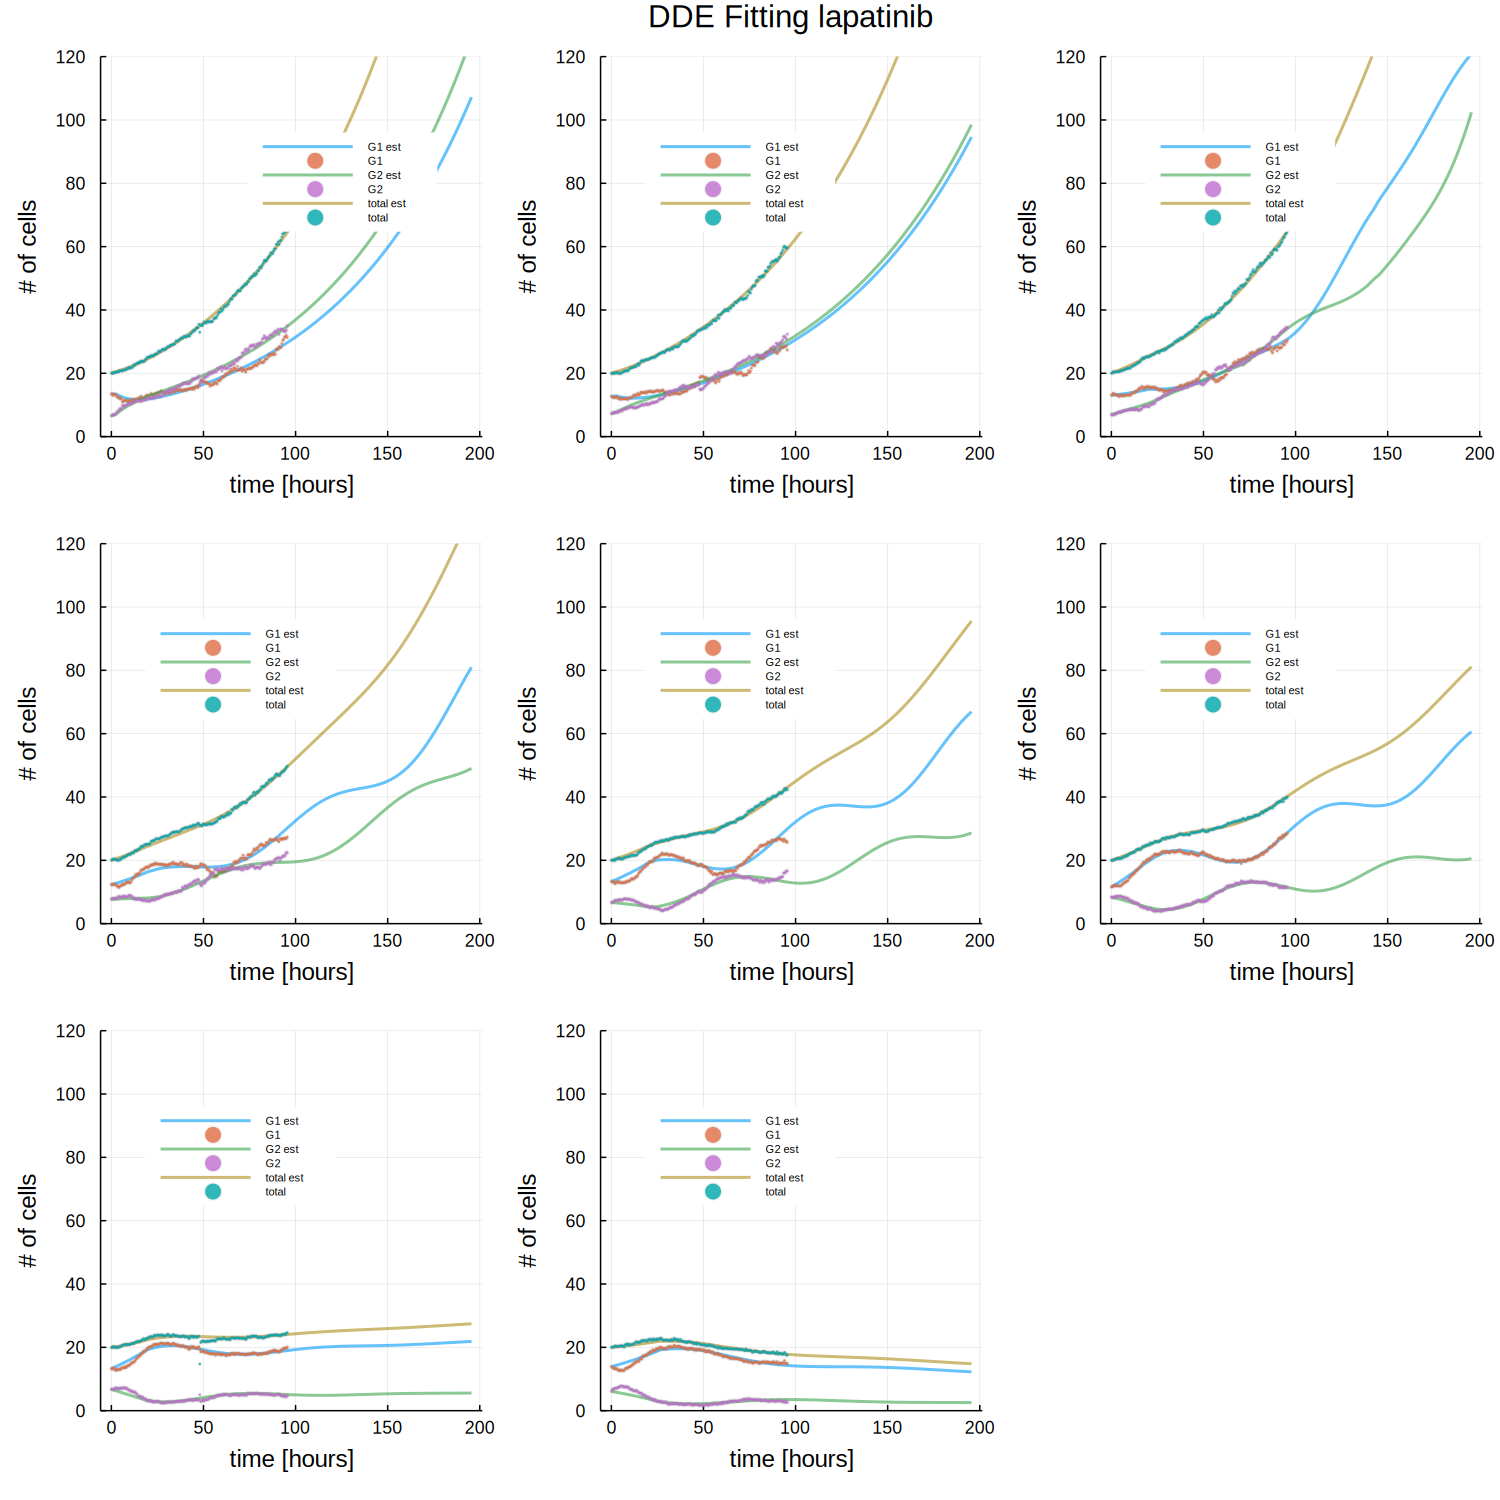

In [6]:

# i showas the trial number, which could be from 1:control, ..., 8: maximum drug concentraation
p1 = plotIt(parameters[:, 1], 1, "", :best)
p2 = plotIt(parameters[:, 2], 2, "DDE Fitting lapatinib", :topleft)
p3 = plotIt(parameters[:, 3], 3, "", :topleft)
p4 = plotIt(parameters[:, 4], 4, "", :topleft)
p5 = plotIt(parameters[:, 5], 5, "", :topleft)
p6 = plotIt(parameters[:, 6], 6, "", :topleft)
p7 = plotIt(parameters[:, 7], 7, "", :topleft)
p8 = plotIt(parameters[:, 8], 8, "", :topleft)
plot(p1, p2, p3, p4, p5, p6, p7, p8)
plot!(size = (1000, 1000))
ylims!((0.0, 120.0))

### G) DDE parameters for lapatinib

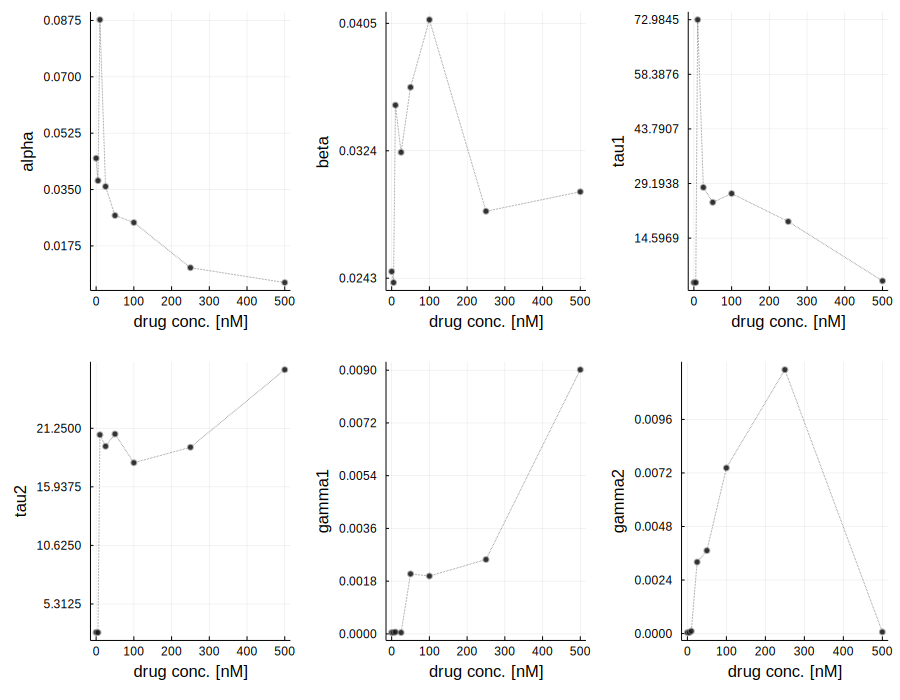

In [7]:
p1 = plot(conc_l, parameters[1,:], xlabel = "drug conc. [nM]", label="", lw= 2.0, alpha = 0.6, color=[:black :gray], line=(:dot, 1), marker=([:dot :d], 3, 0.7, stroke(0.1, 0.6, :gray)),
    ylabel = "alpha", yticks = 0.0:round(maximum(parameters[1,:])/5 ,digits = 4):maximum(parameters[1,:]))

p2 = plot(conc_l, parameters[2,:], xlabel = "drug conc. [nM]", label = "", lw= 2.0, alpha = 0.6, color=[:black :gray], line=(:dot, 1), marker=([:dot :d], 3, 0.7, stroke(0.1, 0.6, :gray)),
    ylabel = "beta", yticks = 0.0:round(maximum(parameters[2,:])/5 ,digits = 4):maximum(parameters[2,:]))

p3 = plot(conc_l, parameters[3,:], xlabel = "drug conc. [nM]", label="", lw= 2.0, alpha = 0.6, color=[:black :gray], line=(:dot, 1), marker=([:dot :d], 3, 0.7, stroke(0.1, 0.6, :gray)),
    ylabel = "tau1", yticks = 0.0:round(maximum(parameters[3,:])/5 ,digits = 4):maximum(parameters[3,:]))

p4 = plot(conc_l, parameters[4,:], xlabel = "drug conc. [nM]", label = "", lw= 2.0, alpha = 0.6, color=[:black :gray], line=(:dot, 1), marker=([:dot :d], 3, 0.7, stroke(0.1, 0.6, :gray)),
    ylabel = "tau2", yticks = 0.0:round(maximum(parameters[4,:])/5 ,digits = 4):maximum(parameters[4,:]))

p5 = plot(conc_l, parameters[5,:], xlabel = "drug conc. [nM]", label = "", lw= 2.0, alpha = 0.6, color=[:black :gray], line=(:dot, 1), marker=([:dot :d], 3, 0.7, stroke(0.1, 0.6, :gray)),
    ylabel = "gamma1", yticks = 0.0:round(maximum(parameters[5,:])/5 ,digits = 4):maximum(parameters[5,:]))

p6 = plot(conc_l, parameters[6,:], xlabel = "drug conc. [nM]", label = "", lw= 2.0, alpha = 0.6, color=[:black :gray], line=(:dot, 1), marker=([:dot :d], 3, 0.7, stroke(0.1, 0.6, :gray)),
    ylabel = "gamma2", yticks = 0.0:round(maximum(parameters[6,:])/5 ,digits = 4):maximum(parameters[6,:]))

plot(p1, p2, p3, p4, p5, p6, dpi = 100)
plot!(size = (900, 700))

### H) DDE Hill fitting 

In [16]:
#  [EC50, b_steepness, alpha_min, alpha_max, beta_min, beta_max, tau1_mean, tau1_max, tau2_min, tau2_max, gamma1_max, gamma2_max]
guess = [125.0, 0.04, 0.007, 0.005, 0.007, 0.005, 30.0, 20.0, 0.003, 0.02]

# max num of steps
num_steps=150

# optimize and return the estimated hill parameters
best_fit, params = optimize_hill(guess, conc_l, g1_l, g2_l, g1_0_l, g2_0_l, num_steps)

# easy way to convert the hill parameters to DDE parameters
p = getDDEparams(params, conc_l)

global optimization begins ...
Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 151 steps and 29.13 seconds
Termination reason: Max number of steps (150) reached
Steps per second = 5.18
Function evals per second = 7.86
Improvements/step = 0.54000
Total function evaluations = 229


Best candidate found: [133.212, 0.811604, 0.0135171, 0.0842934, 0.144783, 0.0260874, 21.2005, 5.01862, 0.0297085, 0.0520997]

Fitness: 734153.527471250



6×8 Array{Float64,2}:
  0.0842934   0.0842934   0.0842934  …   0.0842934   0.0135171   0.0135171
  0.0260874   0.0260874   0.0260874      0.0260874   0.144783    0.144783 
 21.2005     21.2005     21.2005        21.2005     21.2005     21.2005   
  5.01862     5.01862     5.01862        5.01862     5.01862     5.01862  
  0.0         0.0         0.0            0.0         0.0297085   0.0297085
  0.0         0.0         0.0        …   0.0         0.0520997   0.0520997

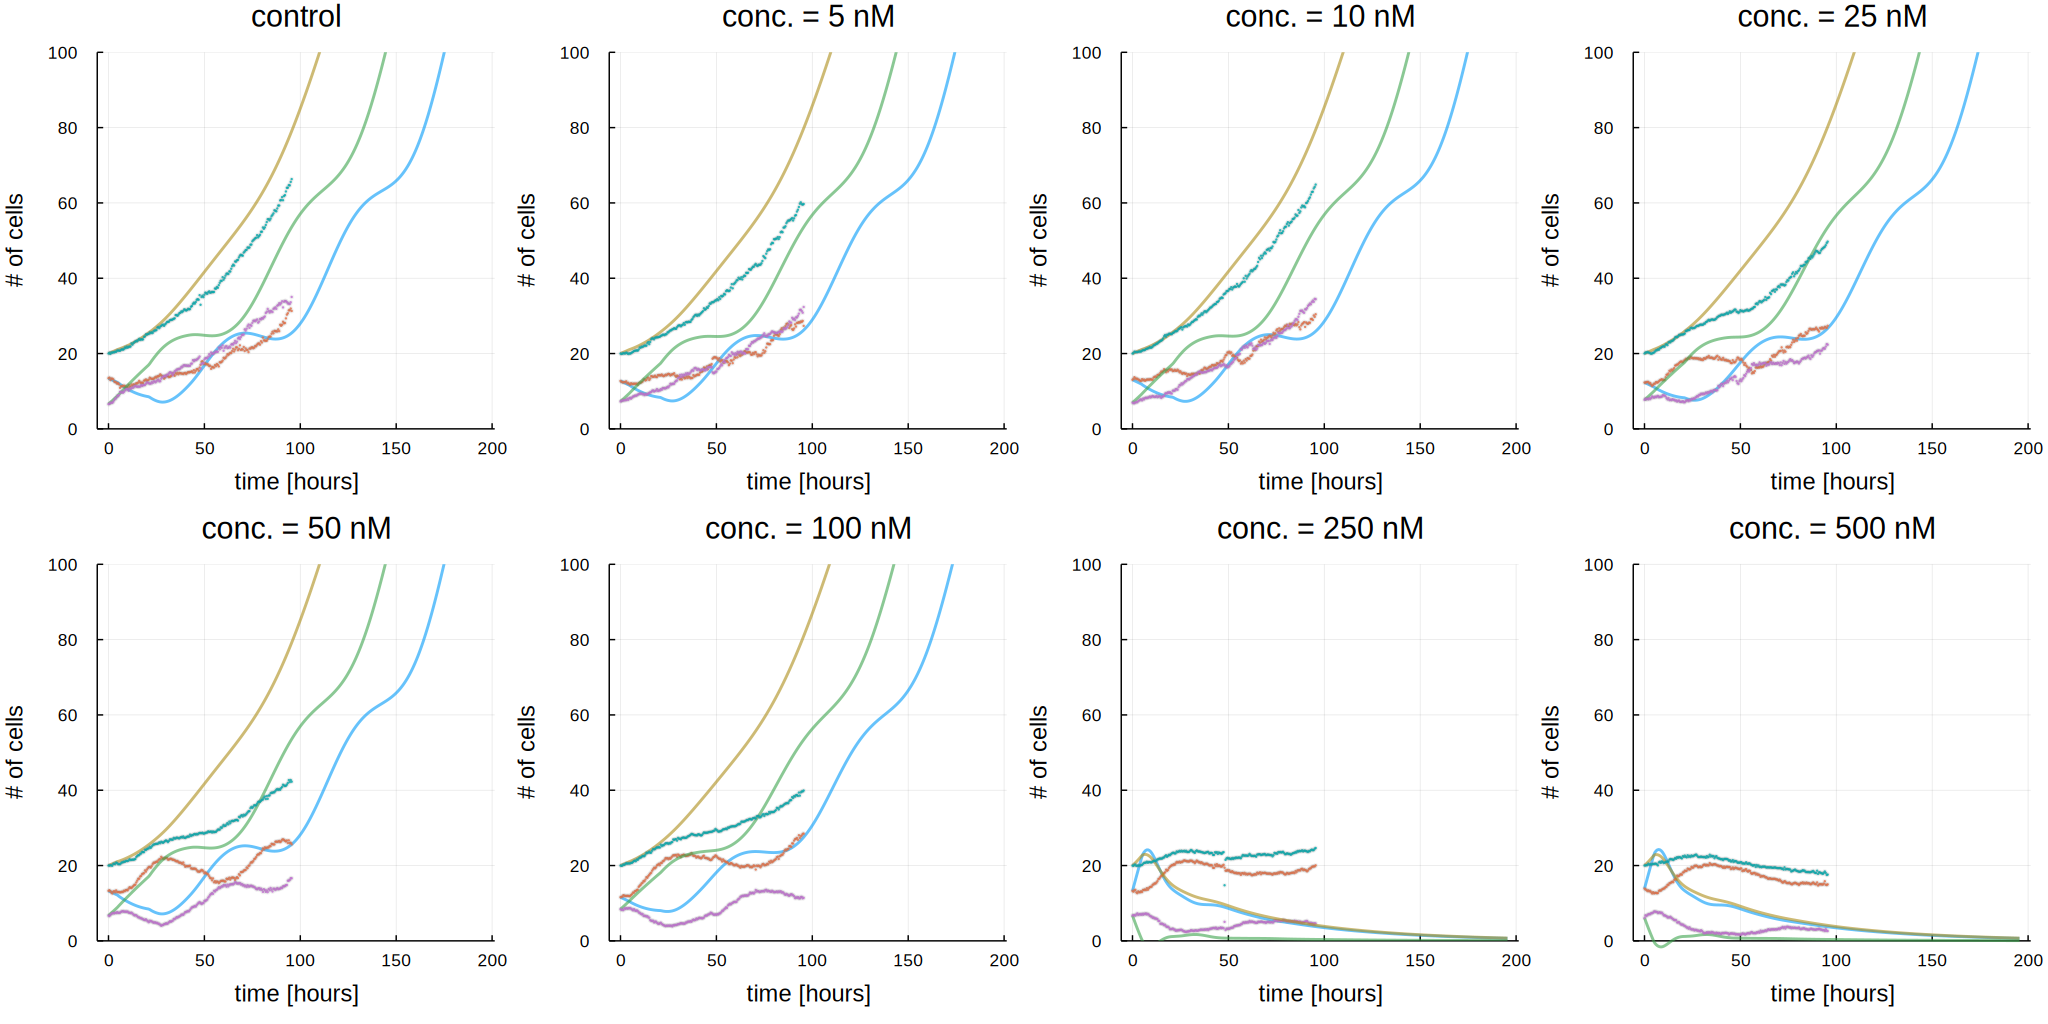

In [17]:
p1 = plotIt(p[:, 1], 1, "control", :left)
p2 = plotIt(p[:, 2], 2, "conc. = 5 nM", false)
p3 = plotIt(p[:, 3], 3, "conc. = 10 nM", false)
p4 = plotIt(p[:, 4], 4, "conc. = 25 nM", false)
p5 = plotIt(p[:, 5], 5, "conc. = 50 nM", false)
p6 = plotIt(p[:, 6], 6, "conc. = 100 nM", false)
p7 = plotIt(p[:, 7], 7, "conc. = 250 nM", false)
p8 = plotIt(p[:, 8], 8, "conc. = 500 nM", false)
plot(p1, p2, p3, p4, p5, p6, p7, p8, layout = (2,4))
plot!(size = (1400, 700), dpi = 150)
ylims!((0.0, 100.0))

### I) DDE Hill Parameters

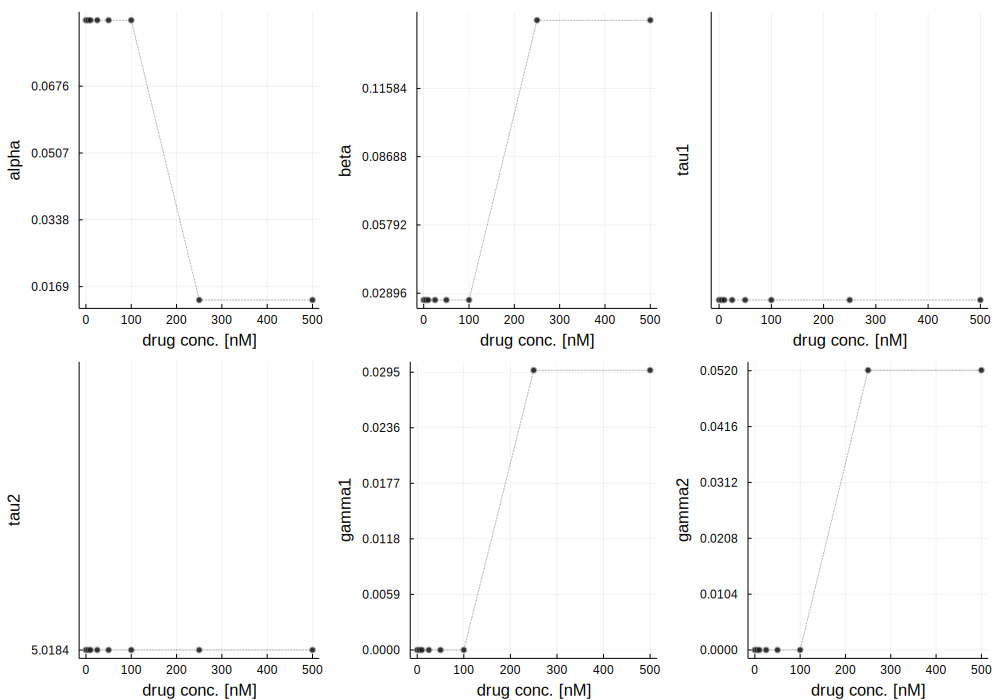

In [18]:
pp1 = plot(conc_l, p[1,:], xlabel = "drug conc. [nM]", label="", lw = 2.0, alpha = 0.6, color=[:black :gray], line=(:dot, 1), marker=([:dot :d], 3, 0.7, stroke(0.1, 0.6, :gray)),
    ylabel = "alpha", yticks = 0.0:round(maximum(p[1,:])/5 ,digits = 4):maximum(p[1,:]))

pp2 = plot(conc_l, p[2,:], xlabel = "drug conc. [nM]", label = "", lw = 2.0, alpha = 0.6, color=[:black :gray], line=(:dot, 1), marker=([:dot :d], 3, 0.7, stroke(0.1, 0.6, :gray)),
    ylabel = "beta", yticks = 0.0:round(maximum(p[2,:])/5 ,digits = 5):maximum(p[2,:]))

pp3 = plot(conc_l, p[3,:], xlabel = "drug conc. [nM]", label="", lw = 2.0, alpha = 0.6, color=[:black :gray], line=(:dot, 1), marker=([:dot :d], 3, 0.7, stroke(0.1, 0.6, :gray)),
    ylabel = "tau1", yticks = 0.0:round(maximum(p[3,:])/5 ,digits = 4):maximum(p[3,:]))

pp4 = plot(conc_l, p[4,:], xlabel = "drug conc. [nM]", label = "", lw = 2.0, alpha = 0.6, color=[:black :gray], line=(:dot, 1), marker=([:dot :d], 3, 0.7, stroke(0.1, 0.6, :gray)),
    ylabel = "tau2", yticks = 0.0:round(maximum(p[4,:])/8 ,digits = 4):maximum(p[4,:]))

pp5 = plot(conc_l, p[5,:], xlabel = "drug conc. [nM]", label = "", lw = 2.0, alpha = 0.6, color=[:black :gray], line=(:dot, 1), marker=([:dot :d], 3, 0.7, stroke(0.1, 0.6, :gray)),
    ylabel = "gamma1", yticks = 0.0:round(maximum(p[5,:])/5 ,digits = 4):maximum(p[5,:]))

pp6 = plot(conc_l, p[6,:], xlabel = "drug conc. [nM]", label = "", lw = 2.0, alpha = 0.6, color=[:black :gray], line=(:dot, 1), marker=([:dot :d], 3, 0.7, stroke(0.1, 0.6, :gray)),
    ylabel = "gamma2", yticks = 0.0:round(maximum(p[6,:])/5 ,digits = 4):maximum(p[6,:]))

plot(pp1, pp2, pp3, pp4, pp5, pp6, dpi = 100)
plot!(size = (1000, 700))

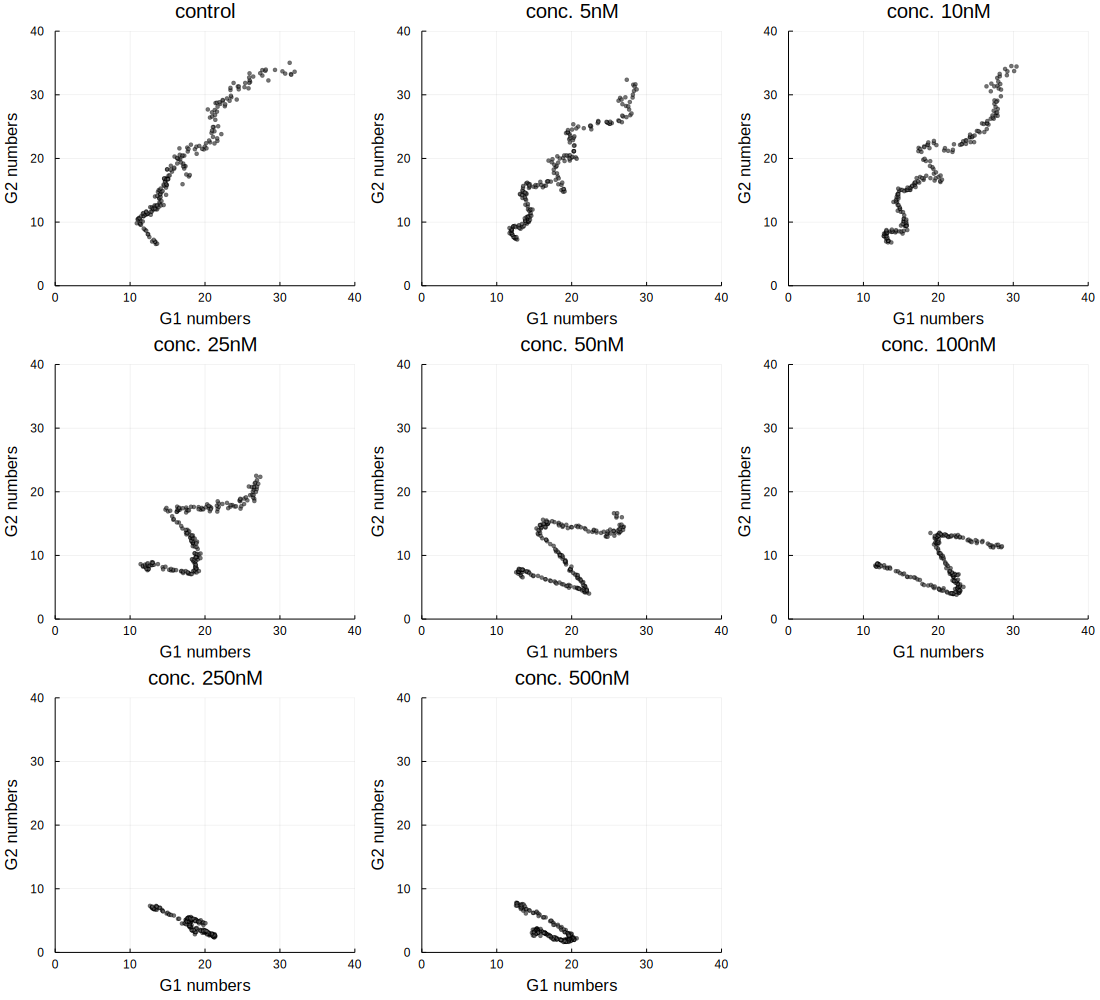

In [15]:
# lapatinib
labels = ["control", "conc. 5nM", "conc. 10nM", "conc. 25nM", "conc. 50nM", "conc. 100nM", "conc. 250nM", "conc. 500nM"]
xlabel = "G1 numbers"
ylabel = "G2 numbers"
ymax = 40
correlationPlot(g1_l, g2_l, labels, xlabel, ylabel, ymax)